In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import terra
import meerkat as mk
from domino.data.visual_genome import read_vg, ATTRIBUTE_GROUPS
import numpy as np
import pandas as pd
from rich import print
import sys
sys.path.insert(1,'/pd/maya/domino/domino')

In [3]:
from domino.evaluate import run_sdms, run_sdm, score_sdm_explanations, score_sdms
import meerkat.contrib.mimic.gcs
pd.set_option('display.max_rows', 1000)


/home/sabri/code/meerkat/meerkat/nn/__init__.py:7: ExperimentalWarning: The `meerkat.nn` module is experimental and has limited test coverage. Proceed with caution.
  warnings.warn(


## Plots

### MIMIC: Synthetic

In [123]:
setting_dp = run_sdms.out(40598).load()
slice_df = score_sdms.out(45159).load() 
slice_df = pd.DataFrame(slice_df)
score_dp = mk.DataPanel.from_pandas(slice_df)
results_dp = mk.merge(
    score_dp,
    setting_dp["config/sdm", "alpha","run_sdm_run_id"], # include any other columns here you'd like to analyze
    on="run_sdm_run_id"
)
emb_col = results_dp["config/sdm"].map(lambda x: x["sdm_config"]["emb"][0])
results_dp["emb_type"] = emb_col

results_df = results_dp.to_pandas()
grouped_df_corr = results_df.iloc[results_df.reset_index().groupby(["slice_name", "slice_idx", "alpha", "emb_type"])['auroc'].idxmax().astype(int)]
grouped_df_corr = grouped_df_corr[grouped_df_corr['emb_type'] != 'mimic_imageonly']
grouped_df_corr = grouped_df_corr[grouped_df_corr['alpha'] != 0.0]
#grouped_df_corr = grouped_df_corr.groupby(['emb_type']).mean()
grouped_df_corr.head()

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,slice_name,index,config/sdm,alpha,emb_type
5311,41210,1,0,0.830594,0.6,0.56,0.52,0.038674,0.071823,0.151934,0.482044,0.172687,atelectasis,atelectasis=0_cardio_group=1,5311,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,bit
5373,41216,3,0,0.836570,0.9,0.80,0.59,0.052486,0.081492,0.140884,0.353591,0.224365,atelectasis,atelectasis=0_cardio_group=1,5373,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,clip
5354,41214,4,0,0.819692,0.6,0.52,0.44,0.030387,0.060773,0.116022,1.000000,0.146233,atelectasis,atelectasis=0_cardio_group=1,5354,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,imagenet
5383,41217,3,0,0.817203,0.2,0.28,0.44,0.020718,0.060773,0.122928,0.948895,0.147015,atelectasis,atelectasis=0_cardio_group=1,5383,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,mimic_multimodal
5460,41225,0,0,0.800520,0.7,0.60,0.56,0.058116,0.112224,0.186373,0.448898,0.131455,atelectasis,atelectasis=0_cardio_group=1,5460,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.4,bit


In [124]:
#setting_dp = run_sdms.out(52180).load()
#slice_df = score_sdms.out(53061).load() 
setting_dp = run_sdms.out(57203).load()
slice_df = score_sdms.out(58676).load()
slice_df = pd.DataFrame(slice_df)
score_dp = mk.DataPanel.from_pandas(slice_df)
results_dp = mk.merge(
    score_dp,
    setting_dp["config/sdm", "alpha","run_sdm_run_id"], # include any other columns here you'd like to analyze
    on="run_sdm_run_id"
)
emb_col = results_dp["config/sdm"].map(lambda x: x["sdm_config"]["emb"][0])
results_dp["emb_type"] = emb_col

results_df = results_dp.to_pandas()
grouped_df_rare = results_df.iloc[results_df.reset_index().groupby(["slice_name", "slice_idx","alpha", "emb_type"])['auroc'].idxmax().astype(int)]
grouped_df_rare = grouped_df_rare[grouped_df_rare['emb_type'] != 'mimic_imageonly']
grouped_df_rare = grouped_df_rare[grouped_df_rare['emb_type'] != 'mimic_multimodal_class']

#grouped_df_rare = grouped_df_rare.groupby(['emb_type']).mean()
grouped_df_rare.head()

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,score_model_run_id,slice_name,index,config/sdm,alpha,emb_type
3068,57867,3,0,0.923509,0.2,0.12,0.07,0.107143,0.250000,0.321429,0.357143,0.009285,lung_group,57119,atelectasis,3068,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0100,bit
3103,57875,3,0,0.940075,0.2,0.20,0.08,0.250000,0.285714,0.428571,0.714286,0.010157,lung_group,57119,atelectasis,3103,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0100,clip
3060,57866,0,0,0.939288,0.2,0.08,0.06,0.071429,0.214286,0.428571,0.071429,0.026667,lung_group,57119,atelectasis,3060,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0100,imagenet
3108,57876,3,0,0.908183,0.0,0.04,0.02,0.035714,0.071429,0.107143,0.714286,0.010477,lung_group,57119,atelectasis,3108,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0100,mimic_multimodal
3219,57899,4,0,0.871810,0.2,0.08,0.11,0.057692,0.105769,0.221154,0.846154,0.033755,lung_group,57120,atelectasis,3219,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0325,bit


In [131]:
setting_dp = run_sdms.out(63176).load()
slice_df = score_sdms.out(64524).load()
slice_df = pd.DataFrame(slice_df)
score_dp = mk.DataPanel.from_pandas(slice_df)
results_dp = mk.merge(
    score_dp,
    setting_dp["config/sdm", "alpha","run_sdm_run_id"], # include any other columns here you'd like to analyze
    on="run_sdm_run_id"
)
emb_col = results_dp["config/sdm"].map(lambda x: x["sdm_config"]["emb"][0])
results_dp["emb_type"] = emb_col

results_df = results_dp.to_pandas()
grouped_df_nl = results_df.iloc[results_df.reset_index().groupby(["slice_name", "slice_idx","alpha", "emb_type"])['auroc'].idxmax().astype(int)]
grouped_df_nl = grouped_df_nl[grouped_df_nl['emb_type'] != 'mimic_imageonly']
grouped_df_nl = grouped_df_nl[grouped_df_nl['emb_type'] != 'mimic_multimodal_class']

#grouped_df_rare = grouped_df_rare.groupby(['emb_type']).mean()
grouped_df_nl.head()

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,score_model_run_id,slice_name,index,config/sdm,alpha,emb_type
3096,63805,1,0,0.915763,0.5,0.64,0.64,0.028452,0.053556,0.109623,0.292050,0.423030,lung_group,63144,atelectasis,3096,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0100,bit
3101,63806,1,0,0.918031,0.7,0.80,0.78,0.031799,0.065272,0.132218,0.371548,0.453061,lung_group,63144,atelectasis,3101,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0100,clip
3091,63804,1,0,0.922961,0.5,0.76,0.77,0.031799,0.064435,0.125523,0.330544,0.535230,lung_group,63144,atelectasis,3091,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0100,imagenet
3106,63807,1,0,0.907392,0.5,0.64,0.68,0.025105,0.056904,0.121339,0.266109,0.389706,lung_group,63144,atelectasis,3106,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0100,mimic_multimodal
3218,63829,3,0,0.861635,0.9,0.80,0.78,0.033473,0.065272,0.125523,0.351464,0.362069,lung_group,63145,atelectasis,3218,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0825,bit


[2021-10-01 06:26:34,811][WARNING][matplotlib.legend:1225] :: No handles with labels found to put in legend.


Text(0, 0.5, 'Precision at 10')

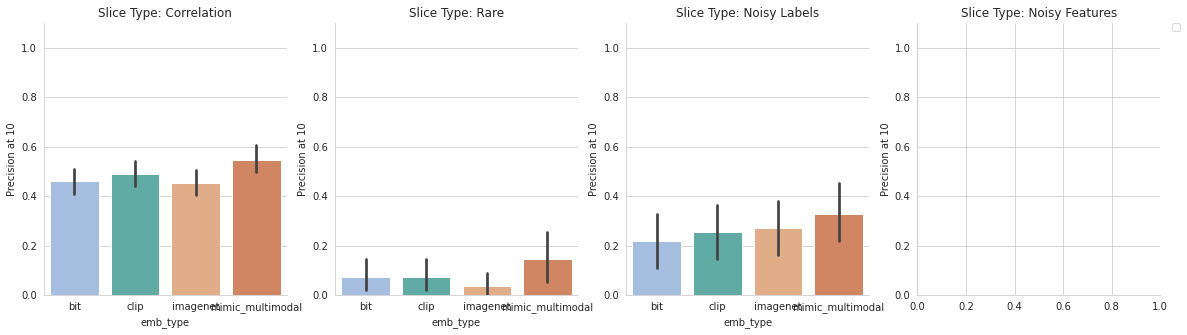

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
#alpha_df = grouped_df[grouped_df['alpha']==0.0]
grouped_df_corr['success'] = (grouped_df_corr['auroc']>0.85) & (grouped_df_corr['precision_at_10']>0.5)
grouped_df_rare['success'] = (grouped_df_rare['auroc']>0.85) & (grouped_df_rare['precision_at_10']>0.5)
grouped_df_nl['success'] = (grouped_df_nl['auroc']>0.85) & (grouped_df_nl['precision_at_10']>0.5)
#grouped_df['success'] = (grouped_df['precision_at_25']>0.5)
#sns.barplot(data=grouped_df, x="alpha", y="success", color='orange')
#sns.pointplot(data=grouped_df, x="alpha", y="success", color='darkorange', dodge=True, join=False)
#plt.title('mimic with correlation slices')
palette = ["#9cbde8", "#53b7ae", "#efab79", "#e27e51",  "#19416e", "#1b6c7b"]
fig, axs = plt.subplots(ncols=4,figsize=(20,5))
sns.set_style("whitegrid")
sns.despine()
grouped_df_corr["alpha"] = grouped_df_corr["alpha"].round(3)
grouped_df_rare["alpha"] = grouped_df_rare["alpha"].round(3)
#sns.pointplot(data=grouped_df_corr, hue="emb_type", y="precision_at_10", x="alpha", linestyles="", dodge=0.3, palette=sns.color_palette(palette, 6), ax=axs[0])
#sns.pointplot(data=grouped_df_nl, hue="emb_type", y="precision_at_10", x="alpha", linestyles="", dodge=0.3, palette=sns.color_palette(palette, 6), ax=axs[1])
sns.barplot(data=grouped_df_corr,y="success",x="emb_type", palette=sns.color_palette(palette, 6), ax=axs[0])
sns.barplot(data=grouped_df_rare,y="success",x="emb_type", palette=sns.color_palette(palette, 6), ax=axs[1])
sns.barplot(data=grouped_df_nl,y="success",x="emb_type", palette=sns.color_palette(palette, 6), ax=axs[2])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[0].title.set_text('Slice Type: Correlation')
axs[1].title.set_text('Slice Type: Rare')
axs[2].title.set_text('Slice Type: Noisy Labels')
axs[3].title.set_text('Slice Type: Noisy Features')
axs[0].set_ylim([0, 1.1])
axs[1].set_ylim([0, 1.1])
axs[2].set_ylim([0, 1.1])
axs[3].set_ylim([0, 1.1])
axs[0].set_ylabel('Precision at 10')
axs[1].set_ylabel('Precision at 10')
axs[2].set_ylabel('Precision at 10')
axs[3].set_ylabel('Precision at 10')

#plt.savefig("mimic_correlation.pdf")

### MIMIC: Semi-Synthetic

In [120]:
from domino.train import score_settings, synthetic_score_settings, train_settings, score_model

run_ids = [58681]
rows = []
score_model_run_ids = mk.concat(
    [score_settings.out(run_id)[0].load()["score_model_run_id"] for run_id in run_ids]
)
print(len(score_model_run_ids))
for score_model_run_id in score_model_run_ids:
    metrics = score_model.out(score_model_run_id)[1]
    if metrics["out_slice_recall_lower"] > metrics["in_slice_0_recall_upper"] + 0.05:
        rows.append({
            "score_model_run_id": score_model_run_id,
            "gap": metrics["out_slice_recall_lower"] - metrics["in_slice_0_recall_upper"]
        } )
under_df = pd.DataFrame(rows)
under_df.shape

55

(19, 2)

In [121]:
#setting_dp = run_sdms.out(52180).load()
#slice_df = score_sdms.out(53061).load() 
setting_dp = run_sdms.out(58849).load()
slice_df = score_sdms.out(60240).load()
slice_df = pd.DataFrame(slice_df)
score_dp = mk.DataPanel.from_pandas(slice_df)
results_dp = mk.merge(
    score_dp,
    setting_dp["config/sdm", "alpha","run_sdm_run_id"], # include any other columns here you'd like to analyze
    on="run_sdm_run_id"
)
emb_col = results_dp["config/sdm"].map(lambda x: x["sdm_config"]["emb"][0])
results_dp["emb_type"] = emb_col

results_df = results_dp.to_pandas()
grouped_df_rare = results_df.iloc[results_df.reset_index().groupby(["slice_name", "slice_idx","alpha", "emb_type"])['auroc'].idxmax().astype(int)]
grouped_df_rare = grouped_df_rare[grouped_df_rare["score_model_run_id"].isin(under_df["score_model_run_id"])]
grouped_df_rare = grouped_df_rare[grouped_df_rare['emb_type'] != 'mimic_imageonly']
grouped_df_rare = grouped_df_rare[grouped_df_rare['emb_type'] != 'mimic_multimodal_class']

#grouped_df_rare = grouped_df_rare.groupby(['emb_type']).mean()
#grouped_df_rare

[2021-10-01 03:11:34,535][WARNING][matplotlib.legend:1225] :: No handles with labels found to put in legend.


Text(0, 0.5, 'Precision at 10')

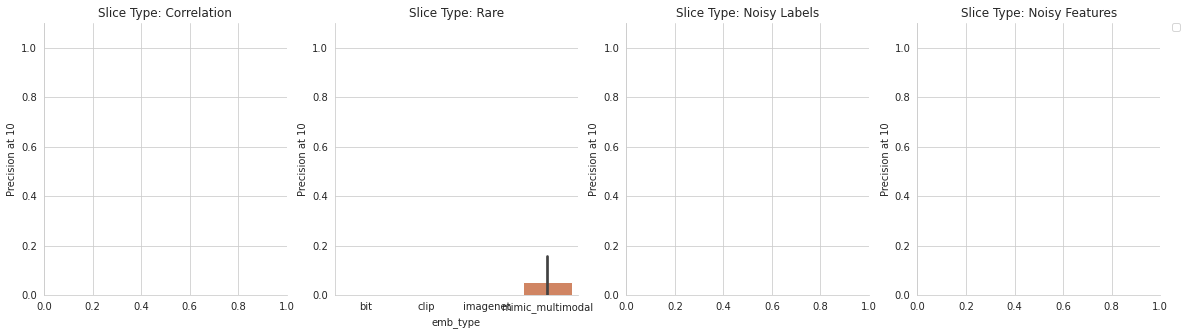

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
#alpha_df = grouped_df[grouped_df['alpha']==0.0]
grouped_df_corr['success'] = (grouped_df_corr['auroc']>0.85) & (grouped_df_corr['precision_at_10']>0.5)
grouped_df_rare['success'] = (grouped_df_rare['auroc']>0.85) & (grouped_df_rare['precision_at_10']>0.5)
#grouped_df['success'] = (grouped_df['precision_at_25']>0.5)
#sns.barplot(data=grouped_df, x="alpha", y="success", color='orange')
#sns.pointplot(data=grouped_df, x="alpha", y="success", color='darkorange', dodge=True, join=False)
#plt.title('mimic with correlation slices')
palette = ["#9cbde8", "#53b7ae", "#efab79", "#e27e51",  "#19416e", "#1b6c7b"]
fig, axs = plt.subplots(ncols=4,figsize=(20,5))
sns.set_style("whitegrid")
sns.despine()
grouped_df_corr["alpha"] = grouped_df_corr["alpha"].round(3)
grouped_df_rare["alpha"] = grouped_df_rare["alpha"].round(3)
#sns.pointplot(data=grouped_df_corr, hue="emb_type", y="precision_at_10", x="alpha", linestyles="", dodge=0.3, palette=sns.color_palette(palette, 6), ax=axs[0])
#sns.pointplot(data=grouped_df_rare, hue="emb_type", y="precision_at_10", x="alpha", linestyles="", dodge=0.3, palette=sns.color_palette(palette, 6), ax=axs[1])
#sns.barplot(data=grouped_df_corr,y="success",x="emb_type", palette=sns.color_palette(palette, 6), ax=axs[0])
sns.barplot(data=grouped_df_rare,y="success",x="emb_type", palette=sns.color_palette(palette, 6), ax=axs[1])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[0].title.set_text('Slice Type: Correlation')
axs[1].title.set_text('Slice Type: Rare')
axs[2].title.set_text('Slice Type: Noisy Labels')
axs[3].title.set_text('Slice Type: Noisy Features')
axs[0].set_ylim([0, 1.1])
axs[1].set_ylim([0, 1.1])
axs[2].set_ylim([0, 1.1])
axs[3].set_ylim([0, 1.1])
axs[0].set_ylabel('Precision at 10')
axs[1].set_ylabel('Precision at 10')
axs[2].set_ylabel('Precision at 10')
axs[3].set_ylabel('Precision at 10')

#plt.savefig("mimic_correlation.pdf")

In [147]:
run_df = train_settings.get_runs()
run_ids = run_df[
    (run_df["status"] == "success")
    & (run_df["hostname"].str.startswith("script-mimic-worker7"))
]["id"][:8]
print(list(run_ids))

[70226, 69543, 68866, 65399]

In [146]:
run_df = train_settings.get_runs()
run_ids = run_df[
    (run_df["status"] == "success")
    & (run_df["hostname"].str.startswith("script-mimic-worker6"))
]["id"][:8]
print(list(run_ids))

[70195, 69522, 68865, 65394]